## DSCI FINAL PROJECT 
### NBA DATA
#### Kyle Cummings 
###### (WORKED ALONE)

Data Source: 
https://www.kaggle.com/datasets/nathanlauga/nba-games

GitHub: https://github.com/CrepeTown/DSCI_FINAL_NBA

Questions
* Who have been some of the top players all time?
* How has the game progressed? By looking at stat progression over the years.
* What stat is the most influential in a team winning?

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

These tables are set up in a 'realtional' way which allows them to be joined very easily.

In [213]:
games_details = pd.read_csv('games_details.csv')
games = pd.read_csv('games.csv')
players = pd.read_csv('players.csv')
teams = pd.read_csv('teams.csv')

C:\Users\Kylec\AppData\Local\Temp\ipykernel_14868\3347670593.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details = pd.read_csv('games_details.csv')


### Table Previews

In [214]:
games_details.head(1)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,Anthony,F,NaN,36:22,...,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0


In [215]:
games.head(1)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.76,...,23.0,53.0,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0


In [216]:
players.head(1)

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019


In [217]:
teams.head(1)

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks


### Serperating Home and Away Games


* Because each game has two teams I separated the two teams; visitor and home into two tables.
* I then modified the data columns to match each other so they could be concatenated together.
* Because only the home team was marked as a win I had to 'negate' the win column for the visitor team.

In [218]:
away_games = pd.merge(teams[['TEAM_ID','NICKNAME']], games, left_on = 'TEAM_ID', right_on='VISITOR_TEAM_ID', how = 'inner')
away_games = away_games.drop(columns=['TEAM_ID','HOME_TEAM_ID','TEAM_ID_home','PTS_home','FG_PCT_home','FT_PCT_home','FG3_PCT_home','AST_home','REB_home','TEAM_ID_away'])
away_games = away_games.rename(columns = {'VISITOR_TEAM_ID':'TEAM_ID', 'PTS_away':'AVG_PTS', 'FT_PCT_away':'FT_PCT', 'FG_PCT_away':'FG_PCT', 'FG3_PCT_away':'FG3_PCT', 'AST_away':'AVG_AST', 'REB_away':'AVG_REB', 'HOME_TEAM_WINS':'WIN'})
away_games['WIN'] = abs(away_games['WIN'] - 1)

home_games = pd.merge(teams[['TEAM_ID','NICKNAME']], games, left_on = 'TEAM_ID', right_on='HOME_TEAM_ID', how = 'inner')
home_games = home_games.drop(columns=['TEAM_ID','VISITOR_TEAM_ID','TEAM_ID_away','PTS_away','FG_PCT_away','FT_PCT_away','FG3_PCT_away','AST_away','REB_away','TEAM_ID_home'])
home_games = home_games.rename(columns = {'HOME_TEAM_ID':'TEAM_ID', 'PTS_home':'AVG_PTS', 'FT_PCT_home':'FT_PCT', 'FG_PCT_home':'FG_PCT', 'FG3_PCT_home':'FG3_PCT', 'AST_home':'AVG_AST', 'REB_home':'AVG_REB', 'HOME_TEAM_WINS':'WIN'})

##### Merging All Games

In [219]:
games = pd.concat([away_games, home_games], axis = 0)

Now we have a dataframe double size of the original because there is one team per game entry. Doing this was extremely necessary to get stats per game per team and is used throught the rest of this notebook. 

In [220]:
games.head()

,NICKNAME,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID,SEASON,AVG_PTS,FG_PCT,FT_PCT,FG3_PCT,AVG_AST,AVG_REB,WIN
0,Hawks,2022-03-09,22100984,Final,1610612737,2021,115.0,0.500,0.818,0.289,26.0,44.0,0
1,Hawks,2022-03-07,22100968,Final,1610612737,2021,110.0,0.452,0.682,0.289,28.0,48.0,0
2,Hawks,2022-03-04,22100948,Final,1610612737,2021,117.0,0.418,0.824,0.361,18.0,39.0,1
3,Hawks,2022-03-01,22100927,Final,1610612737,2021,98.0,0.434,0.792,0.226,15.0,37.0,0
4,Hawks,2022-02-24,22100891,Final,1610612737,2021,108.0,0.423,0.667,0.286,20.0,45.0,0


### Top 10 Most Average Points by Player

In [221]:
top_pts_players= games_details.groupby(['PLAYER_NAME']).mean().sort_values(by='PTS', ascending = False).head(10)[['PTS']]
top_pts_players

,PTS
PLAYER_NAME,
Kevin Durant,26.958736
LeBron James,26.825015
Kobe Bryant,26.621463
Luka Doncic,26.050179
Allen Iverson,25.863341
Zion Williamson,25.619565
Joel Embiid,24.967213
Trae Young,24.682274
James Harden,24.444543


Kevin Durant has averaged the most points in his career over any other player since 2002. Although he along with many others on this list are older in age. There are many younger prospects looking to take his place. 

### Top 10 - Most Average Rebounds by Player

In [222]:
top_reb_players = games_details.groupby(['PLAYER_NAME']).mean().sort_values(by='REB', ascending = False).head(10)[['REB']]
top_reb_players

,REB
PLAYER_NAME,
Andre Drummond,13.111255
Dwight Howard,11.675732
Rudy Gobert,11.358824
Karl-Anthony Towns,11.147929
Joel Embiid,11.013661
Marcus Camby,10.718935
Hassan Whiteside,10.637993
Kevin Love,10.446995
Deandre Ayton,10.435606


Andre Drummond has averaged the most rebounds in his career over any other player since 2002.

### Top 5 - Nuggets Years by % of Games Won

In [223]:
nuggets_games = games.groupby(['SEASON','NICKNAME']).mean()
result_df = nuggets_games.loc[(nuggets_games.index.get_level_values('NICKNAME') == 'Nuggets')]
result_df.sort_values(by = 'WIN', ascending = False)[['WIN']].head(5)

,,WIN
SEASON,NICKNAME,
2008,Nuggets,0.666667
2012,Nuggets,0.652632
2018,Nuggets,0.640000
2020,Nuggets,0.613636
2009,Nuggets,0.610526


To date the Nuggets best 'year' was 2008 winning 66% of their games

### Top 10 - Average Points Per Nuggets Player All Time

In [224]:
nuggets_players = games_details.groupby(['TEAM_CITY','PLAYER_NAME']).mean()
nuggets_players = nuggets_players.loc[(nuggets_players.index.get_level_values('TEAM_CITY') == 'Denver')]
nuggets_players.sort_values(by = 'PTS', ascending = False).head(10)[['PTS']]


PTS
TEAM_CITY PLAYER_NAME                  
Denver    Allen Iverson       24.894737
          Carmelo Anthony     24.458915
          Nikola Jokic        19.425676
          Chauncey Billups    17.991416
          Jamal Murray        16.710723
          Danilo Gallinari    15.931953
          Anthony Roberson    14.200000
          Ty Lawson           14.086498
          Michael Porter Jr.  13.833333
          JR Smith            13.674260

Allen Iverson is the all time points per game leader for the Nuggets with 24.89 points per game. There are a few notable young names on this list who are looking to take his position. 

### NBA Changes Over Time

* In this section I waned to see how stats have changed over the years.
* First I merged the games table and the game_details table so I could get a more detailed look on stats per game.
* This allowed me to get every stat for every player for every game.
* I also converted the GAME_DATE_EST column to just have the year so that I could graph the year of the game rather then the season. 

In [225]:
game_details = pd.merge(games[['GAME_DATE_EST', 'GAME_ID', 'AVG_PTS','FG_PCT','FT_PCT','FG3_PCT']], games_details, on = 'GAME_ID', how = 'inner')
game_details['GAME_DATE_EST'] = pd.to_datetime(game_details['GAME_DATE_EST'])
game_details['GAME_DATE_EST'] = game_details['GAME_DATE_EST'].dt.year

<AxesSubplot:title={'center':'Average Feild Goal %'}, xlabel='GAME_DATE_EST'>

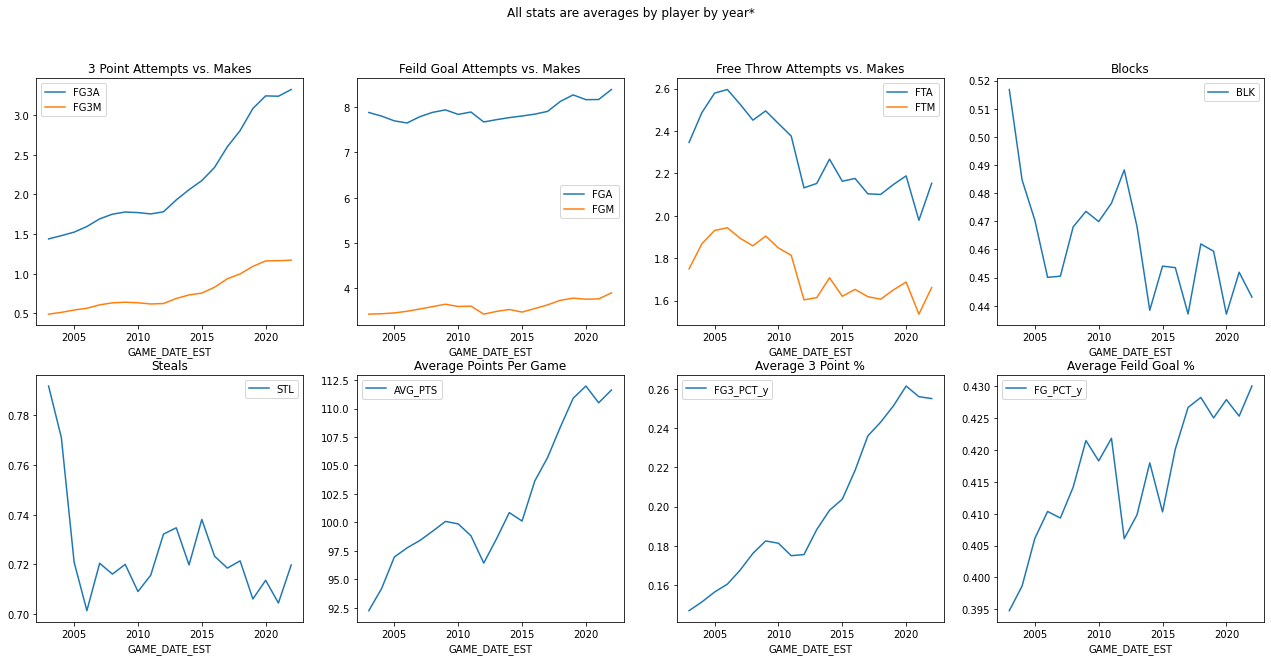

In [226]:
fig, axes = plt.subplots(nrows=2, ncols=4)
fig.set_figheight(10)
fig.set_figwidth(22)
fig.suptitle('All stats are averages by player by year*')
year_means = game_details.groupby(['GAME_DATE_EST']).mean()
year_means[['FG3A','FG3M']].plot(ax=axes[0,0], kind = 'line', title = '3 Point Attempts vs. Makes')
year_means[['FGA', 'FGM']].plot(ax=axes[0,1], kind = 'line', title = 'Feild Goal Attempts vs. Makes')
year_means[['FTA', 'FTM']].plot(ax=axes[0,2], kind = 'line', title = 'Free Throw Attempts vs. Makes')
year_means[['BLK']].plot(ax=axes[0,3], kind = 'line', title = 'Blocks')
year_means[['STL']].plot(ax=axes[1,0], kind = 'line', title = 'Steals')
year_means[['AVG_PTS']].plot(ax=axes[1,1], kind = 'line', title = 'Average Points Per Game')
year_means[['FG3_PCT_y']].plot(ax=axes[1,2], kind = 'line', title = 'Average 3 Point %')
year_means[['FG_PCT_y']].plot(ax=axes[1,3], kind = 'line', title = 'Average Feild Goal %')

Based on the above graphs I find the 3pt data the most interesting. From 2003 - 2020 the number of felid goal attempts has doubled but the 3pt % has also increased. From this data I can conclude that NBA basketball been more dependent on the 3pt shot over the years. Average points per game per team has also increased significantly from 92.5 to 112.5. 

### Correlations

* In this section I wasted to find which NBA stat has the most correlation with a team winning or not.
* I displayed this by showing a table and graphing it to display it visually.

In [227]:
games = games.groupby(['NICKNAME'])['AVG_PTS','FG_PCT','FT_PCT','FG3_PCT','AVG_AST','AVG_REB','WIN'].mean()

corr = games.corr(method='pearson')[['WIN']].sort_values(by = 'WIN', ascending = False)
corr.reset_index(inplace=True)
corr = corr.iloc[1: , :]
corr.style.background_gradient(cmap='coolwarm')

C:\Users\Kylec\AppData\Local\Temp\ipykernel_14868\3232046428.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  games = games.groupby(['NICKNAME'])['AVG_PTS','FG_PCT','FT_PCT','FG3_PCT','AVG_AST','AVG_REB','WIN'].mean()


,index,WIN
1,FG_PCT,0.673448
2,FG3_PCT,0.565631
3,AVG_PTS,0.412679
4,AVG_AST,0.337127
5,AVG_REB,0.258242
6,FT_PCT,0.175425


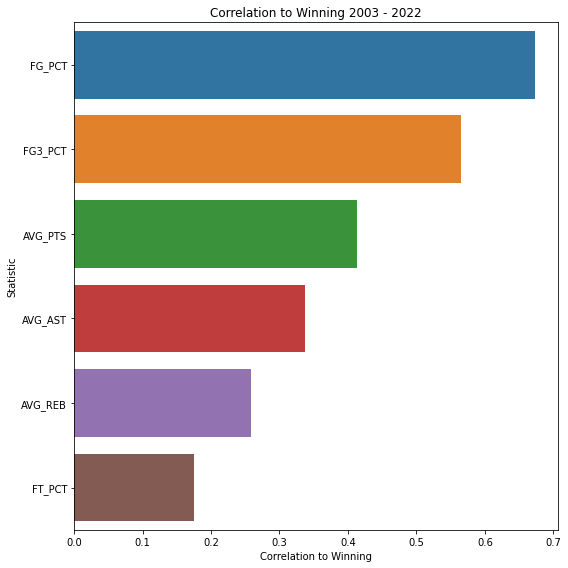

In [228]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title('Correlation to Winning 2003 - 2022')
ax.set_ylabel('Correlation to Winning')
ax = sns.barplot(y='index',x='WIN',data=corr)
ax.set_xlabel('Correlation to Winning')
ax.set_ylabel('Statistic')
plt.tight_layout()
plt.show()

From this chart you can see field goal % has the most impact on weather the team wins or not. Although this is the stat I predicted I am shocked by the correlation at .67. 

#### Overall this project was a success and all my questions were answered. I learned a lot more about pandas dataframes diving much more into the groupby function. I also learned a lot more an merging tables together to get the data you desire.